In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_excel("Data_Train.xlsx")
test_df = pd.read_excel("Test_set.xlsx")
sample = pd.read_excel("Sample_submission.xlsx")

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train = train_df.copy()
test = test_df.copy()

In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
train['Price']=train['Price'].astype(float)

In [ ]:
train['Date'] = train['Date_of_Journey'].str.split("/").str[0]
train['Month'] = train['Date_of_Journey'].str.split("/").str[1]
train['Year'] = train['Date_of_Journey'].str.split("/").str[2]
test['Date'] = test['Date_of_Journey'].str.split("/").str[0]
test['Month'] = test['Date_of_Journey'].str.split("/").str[1]
test['Year'] = test['Date_of_Journey'].str.split("/").str[2]

In [ ]:
train['Date'] = train['Date'].astype(int)
train['Month'] = train['Month'].astype(int)
train['Year'] = train['Year'].astype(int)
test['Date'] = test['Date'].astype(int)
test['Month'] = test['Month'].astype(int)
test['Year'] = test['Year'].astype(int)

In [ ]:
train.drop(columns=['Date_of_Journey'],inplace=True)

In [ ]:
test.drop(columns=['Date_of_Journey'],inplace=True)

In [ ]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
train['Total_Stops'] = train['Total_Stops'].replace('non-stop','0 stop')

In [ ]:
test['Total_Stops'] = test['Total_Stops'].replace('non-stop','0 stop')

In [ ]:
train['Total_Stops'] = train['Total_Stops'].fillna('1 stop')

In [ ]:
train['Total_Stops'] = train['Total_Stops'].str.split(" ").str[0]
test['Total_Stops'] = test['Total_Stops'].str.split(" ").str[0]

In [ ]:
train['Total_Stops'] = train['Total_Stops'].astype(int)
test['Total_Stops'] = test['Total_Stops'].astype(int)

In [ ]:
train['Duration_Hour'] = train['Duration'].str.split(" ").str[0]
train['Duration_Minutes'] = train['Duration'].str.split(" ").str[1]
test['Duration_Hour'] = test['Duration'].str.split(" ").str[0]
test['Duration_Minutes'] = test['Duration'].str.split(" ").str[1]

In [ ]:
train['Duration_Hour'] = train['Duration_Hour'].str.split("h").str[0]
train['Duration_Minutes'] = train['Duration_Minutes'].str.split("m").str[0]
test['Duration_Hour'] = test['Duration_Hour'].str.split("h").str[0]
test['Duration_Minutes'] = test['Duration_Minutes'].str.split("m").str[0]

In [ ]:
train['Duration_Hour'] = train['Duration_Hour'].str.split("m").str[0]
test['Duration_Hour'] = test['Duration_Hour'].str.split("m").str[0]

In [ ]:
train['Duration_Hour'] = train['Duration_Hour'].fillna(0)
train['Duration_Minutes'] = train['Duration_Minutes'].fillna(0)
test['Duration_Hour'] = test['Duration_Hour'].fillna(0)
test['Duration_Minutes'] = test['Duration_Minutes'].fillna(0)

In [ ]:
train['Duration_Hour'] = train['Duration_Hour'].astype(int)
train['Duration_Minutes'] = train['Duration_Minutes'].astype(int)
test['Duration_Hour'] = test['Duration_Hour'].astype(int)
test['Duration_Minutes'] = test['Duration_Minutes'].astype(int)

In [ ]:
train.drop(columns=['Duration'],inplace=True)
test.drop(columns=['Duration'],inplace=True)

In [ ]:
train['Dep_Hour'] = train['Dep_Time'].str.split(':').str[0]
train['Dep_Minutes'] = train['Dep_Time'].str.split(':').str[1]
test['Dep_Hour'] = test['Dep_Time'].str.split(':').str[0]
test['Dep_Minutes'] = test['Dep_Time'].str.split(':').str[1]

In [ ]:
train['Dep_Hour'] = train['Dep_Hour'].astype(int)
train['Dep_Minutes'] = train['Dep_Minutes'].astype(int)
test['Dep_Hour'] = test['Dep_Hour'].astype(int)
test['Dep_Minutes'] = test['Dep_Minutes'].astype(int)

In [ ]:
train.drop(columns=['Dep_Time'],inplace=True)
test.drop(columns=['Dep_Time'],inplace=True)

In [ ]:
train['Arrival_Time'] = train['Arrival_Time'].str.split(" ").str[0]
test['Arrival_Time'] = test['Arrival_Time'].str.split(" ").str[0]

In [ ]:
train['Arrival_Hour'] = train['Arrival_Time'].str.split(":").str[0]
train['Arrival_Minutes'] = train['Arrival_Time'].str.split(":").str[1]
test['Arrival_Hour'] = test['Arrival_Time'].str.split(":").str[0]
test['Arrival_Minutes'] = test['Arrival_Time'].str.split(":").str[1]

In [ ]:
train['Arrival_Hour'] = train['Arrival_Hour'].astype(int)
train['Arrival_Minutes'] = train['Arrival_Minutes'].astype(int)
test['Arrival_Hour'] = test['Arrival_Hour'].astype(int)
test['Arrival_Minutes'] = test['Arrival_Minutes'].astype(int)

In [ ]:
train.drop(columns=['Arrival_Time'],inplace=True)
test.drop(columns=['Arrival_Time'],inplace=True)

In [ ]:
train['Route_1'] = train['Route'].str.split('→ ').str[0]
train['Route_2'] = train['Route'].str.split('→ ').str[1]
train['Route_3'] = train['Route'].str.split('→ ').str[2]
train['Route_4'] = train['Route'].str.split('→ ').str[3]
train['Route_5'] = train['Route'].str.split('→ ').str[4]
test['Route_1'] = test['Route'].str.split('→ ').str[0]
test['Route_2'] = test['Route'].str.split('→ ').str[1]
test['Route_3'] = test['Route'].str.split('→ ').str[2]
test['Route_4'] = test['Route'].str.split('→ ').str[3]
test['Route_5'] = test['Route'].str.split('→ ').str[4]

In [ ]:
train['Route_1'].fillna('None',inplace=True)
train['Route_2'].fillna('None',inplace=True)
train['Route_3'].fillna('None',inplace=True)
train['Route_4'].fillna('None',inplace=True)
train['Route_5'].fillna('None',inplace=True)
test['Route_1'].fillna('None',inplace=True)
test['Route_2'].fillna('None',inplace=True)
test['Route_3'].fillna('None',inplace=True)
test['Route_4'].fillna('None',inplace=True)
test['Route_5'].fillna('None',inplace=True)

In [ ]:
train.drop(columns=['Route'],inplace=True)
test.drop(columns=['Route'],inplace=True)

In [ ]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_Hour,Duration_Minutes,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,2,50,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,7,25,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,19,0,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,5,25,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,4,45,16,50,21,35,BLR,NAG,DEL,None,None


In [ ]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Duration_Hour,Duration_Minutes,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,1,No info,6,6,2019,10,55,17,30,4,25,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,1,No info,12,5,2019,4,0,6,20,10,20,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,2019,23,45,19,15,19,0,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,2019,13,0,8,0,21,0,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,0,No info,24,6,2019,2,50,23,55,2,45,BLR,DEL,None,None,None


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Total_Stops       10683 non-null  int64  
 4   Additional_Info   10683 non-null  object 
 5   Price             10683 non-null  float64
 6   Date              10683 non-null  int64  
 7   Month             10683 non-null  int64  
 8   Year              10683 non-null  int64  
 9   Duration_Hour     10683 non-null  int64  
 10  Duration_Minutes  10683 non-null  int64  
 11  Dep_Hour          10683 non-null  int64  
 12  Dep_Minutes       10683 non-null  int64  
 13  Arrival_Hour      10683 non-null  int64  
 14  Arrival_Minutes   10683 non-null  int64  
 15  Route_1           10683 non-null  object 
 16  Route_2           10683 non-null  object

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Source            2671 non-null   object
 2   Destination       2671 non-null   object
 3   Total_Stops       2671 non-null   int64 
 4   Additional_Info   2671 non-null   object
 5   Date              2671 non-null   int64 
 6   Month             2671 non-null   int64 
 7   Year              2671 non-null   int64 
 8   Duration_Hour     2671 non-null   int64 
 9   Duration_Minutes  2671 non-null   int64 
 10  Dep_Hour          2671 non-null   int64 
 11  Dep_Minutes       2671 non-null   int64 
 12  Arrival_Hour      2671 non-null   int64 
 13  Arrival_Minutes   2671 non-null   int64 
 14  Route_1           2671 non-null   object
 15  Route_2           2671 non-null   object
 16  Route_3           2671 non-null   object
 17  Route_4       

In [ ]:
train.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Duration_Hour       0
Duration_Minutes    0
Dep_Hour            0
Dep_Minutes         0
Arrival_Hour        0
Arrival_Minutes     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [ ]:
test.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Date                0
Month               0
Year                0
Duration_Hour       0
Duration_Minutes    0
Dep_Hour            0
Dep_Minutes         0
Arrival_Hour        0
Arrival_Minutes     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
train['Airline'] = encoder.fit_transform(train['Airline'])
train['Source'] = encoder.fit_transform(train['Source'])
train['Destination'] = encoder.fit_transform(train['Destination'])
train['Route_1'] = encoder.fit_transform(train['Route_1'])
train['Route_2'] = encoder.fit_transform(train['Route_2'])
train['Route_3'] = encoder.fit_transform(train['Route_3'])
train['Route_4'] = encoder.fit_transform(train['Route_4'])
train['Route_5'] = encoder.fit_transform(train['Route_5'])
train['Additional_Info'] = encoder.fit_transform(train['Additional_Info'])

test['Airline'] = encoder.fit_transform(test['Airline'])
test['Source'] = encoder.fit_transform(test['Source'])
test['Destination'] = encoder.fit_transform(test['Destination'])
test['Route_1'] = encoder.fit_transform(test['Route_1'])
test['Route_2'] = encoder.fit_transform(test['Route_2'])
test['Route_3'] = encoder.fit_transform(test['Route_3'])
test['Route_4'] = encoder.fit_transform(test['Route_4'])
test['Route_5'] = encoder.fit_transform(test['Route_5'])
test['Additional_Info'] = encoder.fit_transform(test['Additional_Info'])

In [ ]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_Hour,Duration_Minutes,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,2,50,22,20,1,10,0,13,24,12,4
1,1,3,0,2,8,7662.0,1,5,2019,7,25,5,50,13,15,2,25,1,3,4
2,4,2,1,2,8,13882.0,9,6,2019,19,0,9,25,4,25,3,32,4,5,4
3,3,3,0,1,8,6218.0,12,5,2019,5,25,18,5,23,30,2,34,3,12,4
4,3,0,5,1,8,13302.0,1,3,2019,4,45,16,50,21,35,0,34,8,12,4


In [ ]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Duration_Hour,Duration_Minutes,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,1,5,6,6,2019,10,55,17,30,4,25,3,7,5,8,3
1,3,3,0,1,5,12,5,2019,4,0,6,20,10,20,2,29,3,8,3
2,4,2,1,1,3,21,5,2019,23,45,19,15,19,0,3,7,5,8,3
3,6,2,1,1,5,21,5,2019,13,0,8,0,21,0,3,7,5,8,3
4,0,0,2,0,5,24,6,2019,2,50,23,55,2,45,0,13,21,8,3


### **FEATURE ENGINEERING**

In [ ]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

In [ ]:
X = train.drop(['Price'],axis=1)
y = train.Price

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
selected_features = X_train.columns[(model.get_support())]

In [ ]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Duration_Hour', 'Duration_Minutes', 'Dep_Hour',
       'Dep_Minutes', 'Arrival_Hour', 'Arrival_Minutes', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
X_train = X_train.drop(['Year'],axis=1)

In [ ]:
X_test = X_test.drop(['Year'],axis=1)

In [ ]:
test = test.drop(['Year'],axis=1)

## **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('The coefficient of determination R^2 for train set is: {}'.format(regressor.score(X_train,y_train)))

The coefficient of determination R^2 for train set is: 0.4974024554979105


In [ ]:
print('The coefficient of determination R^2 for train set is: {}'.format(regressor.score(X_test,y_test)))

The coefficient of determination R^2 for train set is: 0.5012079965996457


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

0.4957920664851585

In [ ]:
y_pred = regressor.predict(X_test)

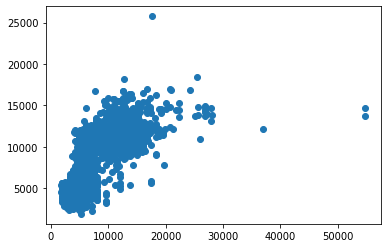

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
y_pred_test = regressor.predict(test)

##**RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_reg.score(X_train,y_train)

0.9805007016054506

In [ ]:
rf_reg.score(X_test,y_test)

0.8561711275802228

In [ ]:
rf_pred = rf_reg.predict(X_test)

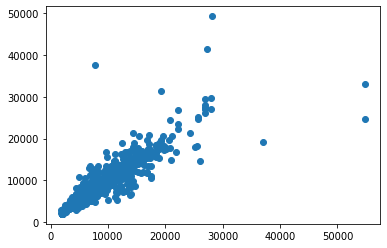

In [ ]:
plt.scatter(y_test,rf_pred)

In [ ]:
rf_pred_test = rf_reg.predict(test)

In [ ]:
rf_pred_test

array([10706.61,  8100.75, 31660.57, ..., 14434.84, 15324.59,  8101.17])

In [ ]:
pd.DataFrame(rf_pred_test,columns=['Price']).to_csv('Harshith_Submission.csv')